In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import random
import re

In [2]:
dataset=pd.read_csv("Chocolate bar ratings 2022.csv")
dataset

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
...,...,...,...,...,...,...,...,...,...,...
2583,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   object 
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 202.3+ KB


In [4]:
data_choco=dataset.copy()
data_choco.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [5]:
data_choco=data_choco.dropna()

In [6]:
data_choco=data_choco.reset_index(drop=True)

Let's create a word cloud with the most memorable characteristics

In [7]:
memorable_charac=data_choco['Most Memorable Characteristics']

In [8]:
file = open('memorable_characteristics.txt','w')
for  word in memorable_charac:
	file.write(word+",")
file.close()

In [9]:
with open('memorable_characteristics.txt') as file:
    words = file.readlines()

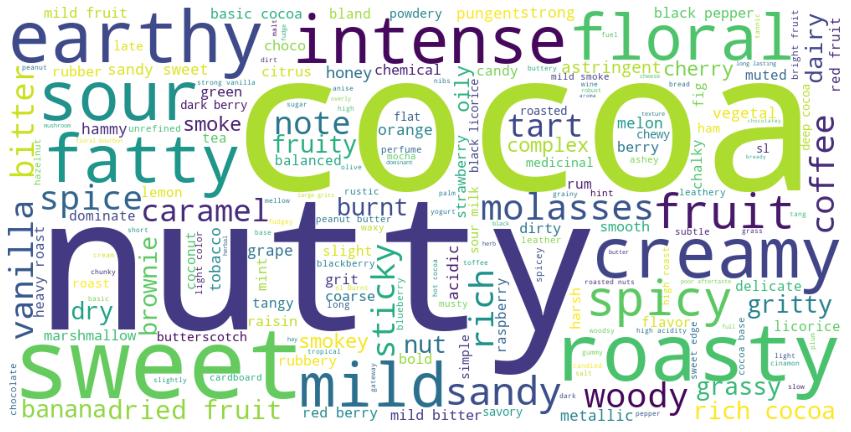

In [10]:
#convert list to string and generate
unique_string=(" ").join(words)
wordcloud = WordCloud(width = 1000, height = 500,background_color='White').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("word_cloud_chocolatebar"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [11]:
#statistics testing
choc_test=data_choco[['Rating','Ingredients']]
choc_test


,Rating,Ingredients
0,3.25,"3- B,S,C"
1,3.75,"3- B,S,C"
2,3.50,"3- B,S,C"
3,3.00,"3- B,S,C"
4,3.50,"3- B,S,C"
...,...,...
2496,2.75,"4- B,S*,C,Sa"
2497,3.75,"3- B,S,C"
2498,3.00,"3- B,S,C"
2499,3.25,"3- B,S,C"


In [12]:
choc_test[['Number','Ingre']]=choc_test.Ingredients.str.split(" ",expand=True)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [13]:
del choc_test['Ingredients']

In [14]:
del choc_test['Number']

In [15]:
choc_test.rename(columns={'Ingre':'Ingredients'},inplace=True)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


From now on, we will lead a statistics test about chocolate's rating with sugar and no sugar. 
We will apply to the Mann-Whitney U test.

In [16]:
no_sugar=[]
contains_sugar=[]

In [17]:
choc_test['Ingredients'].value_counts()

B,S,C         1029
B,S            738
B,S,C,L        293
B,S,C,V,L      184
B,S,C,V        141
B,S*            31
B,S*,C,Sa       20
B,S*,C          13
B,S,L            8
B,S*,C,V         7
B                6
B,S,V,L          5
B,S,C,Sa         5
B,S,V            3
B,S*,V,L         3
B,S*,C,L         2
B,S*,Sa          1
B,C              1
B,S,C,L,Sa       1
Name: Ingredients, dtype: int64

Notice the lines that contain in its second position the S* it does not have the sugar in its letter sequence

In [19]:
choc_test.isnull().sum()

Rating          0
Ingredients    10
dtype: int64

In [20]:
choc_test=choc_test.dropna()

In [21]:
choc_test.isnull().sum()

Rating         0
Ingredients    0
dtype: int64

In [22]:
choc_test=choc_test.reset_index(drop=True)

In [23]:
choc_test

,Rating,Ingredients
0,3.25,"B,S,C"
1,3.75,"B,S,C"
2,3.50,"B,S,C"
3,3.00,"B,S,C"
4,3.50,"B,S,C"
...,...,...
2486,2.75,"B,S*,C,Sa"
2487,3.75,"B,S,C"
2488,3.00,"B,S,C"
2489,3.25,"B,S,C"


In [24]:
#no_sugar
for i in range(0,2491):
    if  choc_test['Ingredients'][i]=='B':
        no_sugar.append(choc_test['Ingredients'][i])    

In [25]:
#no_sugar
for i in range(0,2491):
    if  choc_test['Ingredients'][i]=='B,C':
        no_sugar.append(choc_test['Ingredients'][i])

In [26]:
#no_sugar
for i in range(0,2491):
   if len(choc_test['Ingredients'][i])>=4:
      if choc_test['Ingredients'][i][3]=='*':
         no_sugar.append(choc_test['Ingredients'][i])

In [33]:
#contains_sugar
for i in range(0,2491):
   if len(choc_test['Ingredients'][i])>=2:
      if choc_test['Ingredients'][i][2]=='S':
         contains_sugar.append(choc_test['Ingredients'][i])

In [43]:
len(no_sugar)

84

In [44]:
len(contains_sugar)

2484

In [45]:
rating_nosugar=[]
rating_sugar=[]

In [47]:
#chocolate's rating without sugar
for i in range(0,2491):
    if choc_test['Ingredients'][i] in no_sugar:
        rating_nosugar.append(choc_test['Rating'][i])
    else:
        rating_sugar.append(choc_test['Rating'][i])

In [169]:
significancia=0.10

In [188]:
#aleatory sample
new_rating_sugar=random.sample(rating_sugar,k=20)
new_rating_nosugar=random.sample(rating_nosugar,k=20)

In [189]:
rating_sugar_series=pd.Series(new_rating_sugar)
rating_nosugar_series=pd.Series(new_rating_nosugar)

u0=Sugar chocolate's average rating; u1= Non-sugar chocolate's average rating

H0: u0=u1;


H1: u0> u1.

In [190]:
u, p_valor = mannwhitneyu(rating_sugar_series, rating_nosugar_series, alternative='greater')

print('u =', u)
print('p =',p_valor)

if(p_valor <= significancia):
    print('Reject H0')
else:
    print('Accept H0')

u = 222.5
p = 0.27085459750615304
Accept H0


Therefore, the null hypothesis is true, taking into consideration a trust of 90%.

In [29]:
percen_rat=data_choco[['Cocoa Percent','Rating']].sort_values(by='Rating',ascending=False).reset_index(drop=True)

In [30]:
percen_rat

,Cocoa Percent,Rating
0,70%,4.0
1,70%,4.0
2,70%,4.0
3,64%,4.0
4,70%,4.0
...,...,...
2496,85%,1.5
2497,70%,1.5
2498,65%,1.5
2499,67%,1.5


In [31]:
percen_rat['Cocoa Percent'] = percen_rat['Cocoa Percent'].str.rstrip('%').astype('float') / 100.0

In [66]:
percen_rat

,Cocoa Percent,Rating
0,0.70,4.0
1,0.70,4.0
2,0.70,4.0
3,0.64,4.0
4,0.70,4.0
...,...,...
2496,0.85,1.5
2497,0.70,1.5
2498,0.65,1.5
2499,0.67,1.5


In [67]:
cocoa_nosugar=[]
cocoa_sugar=[]

In [68]:
#Cocoa percent---No sugar and with sugar
for i in range(0,2500):
    if percen_rat['Rating'][i] in rating_nosugar:
        cocoa_nosugar.append(percen_rat['Cocoa Percent'][i])
    else:
        cocoa_sugar.append(percen_rat['Cocoa Percent'][i])

Chocolate with no sugar-- cocoa percent distribution

In [80]:
cocoa_nosugar=pd.Series(cocoa_nosugar)
cocoa_nosugar.value_counts(normalize=True).iloc[0:5]

0.70    0.410482
0.75    0.123270
0.72    0.119497
0.80    0.036059
0.65    0.035220
dtype: float64

Chocolate with sugar-- cocoa percent distribution

In [85]:
cocoa_sugar=pd.Series(cocoa_sugar)
cocoa_sugar.value_counts(normalize=True).iloc[0:5]

0.70    0.513043
0.72    0.139130
0.75    0.130435
0.74    0.034783
0.64    0.026087
dtype: float64

In [154]:
coun_ratin=data_choco[['Country of Bean Origin','Rating']].sort_values(by='Rating',ascending=False).reset_index(drop=True)
countries=[]
for i in range(0,2500):
    if coun_ratin['Rating'][i]==4:
        countries.append(coun_ratin['Country of Bean Origin'][i])

In [163]:
my_dict = {i:countries.count(i) for i in countries}
my_dict

{'Mexico': 5,
 'Peru': 19,
 'Blend': 7,
 'Venezuela': 20,
 'Ecuador': 9,
 'Madagascar': 11,
 'Papua New Guinea': 4,
 'Ghana': 2,
 'Indonesia': 1,
 'Bolivia': 5,
 'Guatemala': 3,
 'Nicaragua': 2,
 'Haiti': 3,
 'Brazil': 5,
 'Uganda': 1,
 'Vietnam': 2,
 'Costa Rica': 2,
 'Colombia': 5,
 'Belize': 2,
 'Solomon Islands': 1,
 'Jamaica': 1,
 'St. Lucia': 1,
 'Dominican Republic': 1,
 'Sao Tome': 1,
 'Tanzania': 1}